In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,2,0,2,0,1,0,4,...,0,0,1,0,0,1,0,4,0,1
1,1,1,1,0,0,2,0,1,1,1,...,1,1,0,0,0,0,1,4,2,0
2,1,0,1,1,1,3,1,0,2,1,...,1,0,1,0,1,0,0,4,2,2
3,1,0,0,1,0,0,1,0,2,2,...,0,0,1,0,0,0,1,3,2,1
4,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,4,0,1


In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,0,0,3,0,0,0,0,...,1,0,0,1,0,1,0,4,1,1
1,1,1,1,0,0,3,1,0,1,1,...,1,0,1,0,1,0,0,3,0,2
2,0,0,0,0,0,2,1,0,1,1,...,1,0,1,0,0,1,0,3,2,1
3,0,1,1,0,0,3,0,0,1,1,...,0,0,1,0,1,0,0,1,1,2
4,1,1,0,0,0,0,0,0,1,3,...,1,0,1,0,0,0,1,1,1,1


In [4]:
X_train = train.drop('fraud', axis=1) 
y_train = train['fraud']

X_test = test.drop('fraud', axis=1) 
y_test = test['fraud']

### Random Forest Classifier

#### Baseline Model

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

param_grid = {'n_estimators': list(range(50, 401)), 'max_depth': list(range(6,16))}
#rf_classifier = RandomForestClassifier(class_weight='balanced', max_features=None, random_state=1, n_jobs=-1)

# Emphasize recall to capture as many fraud cases as possible without compromising overall accuracy too much
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='recall', n_jobs=-1)

# Fit the grid search to the training data
#grid_search.fit(X_train, y_train)


#best_n_estimators = grid_search.best_params_['n_estimators'] #82
#best_depth = grid_search.best_params_['max_depth'] #7
best_n_estimators = 82
best_depth = 7
print("Best No. of Estimators (Trees):", best_n_estimators)
print("Best Maximum Tree Depth:", best_depth)

# Retrain the model using the best value of n_estimators
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=None,
                                            max_depth=best_depth, max_features=None, random_state=1, n_jobs=-1)
best_rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
test_predictions = best_rf_classifier.predict(X_test)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

# Print the results
print('\n')
print('Performance Metrics for Baseline Random Forest Classifier: ')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

Best No. of Estimators (Trees): 82
Best Maximum Tree Depth: 7


Performance Metrics for Baseline Random Forest Classifier: 
Precision: 0.5000
Recall: 0.0036
F1 Score: 0.0072


#### Applying SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Best No. of Estimators (Trees): 82
Best Maximum Tree Depth: 7


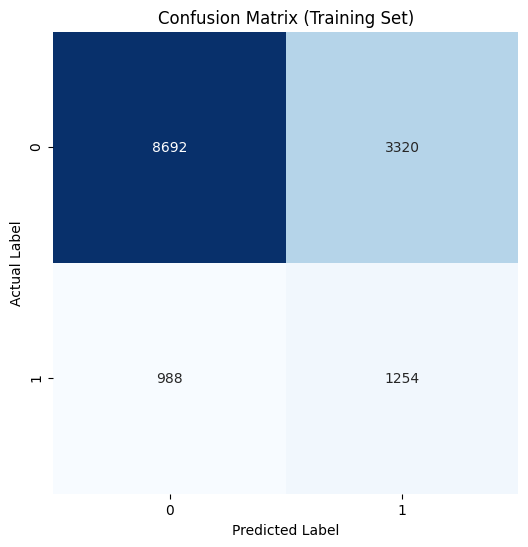

Precision (Training Set): 0.2742
Recall (Training Set): 0.5593
F1 Score (Training Set): 0.3680


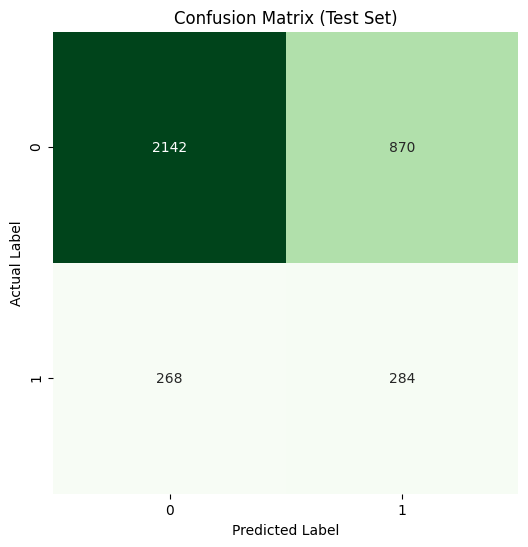

Precision (Test Set): 0.2461
Recall (Test Set): 0.5145
F1 Score (Test Set): 0.3329


In [7]:
# Retrain with SMOTE

param_grid = {'n_estimators': list(range(50, 401)), 'max_depth': list(range(6,16))}
#rf_classifier = RandomForestClassifier(class_weight='balanced', max_features=None, random_state=1, n_jobs=-1)

# Emphasize recall to capture as many fraud cases as possible without compromising overall accuracy too much
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='recall', n_jobs=-1)

# Fit the grid search to the training data
#grid_search.fit(X_train_resampled, y_train_resampled )

#best_n_estimators = grid_search.best_params_['n_estimators'] #82
#best_depth = grid_search.best_params_['max_depth'] #7
best_n_estimators = 82
best_depth = 7
print("Best No. of Estimators (Trees):", best_n_estimators)
print("Best Maximum Tree Depth:", best_depth)

# Retrain the model using the best value of n_estimators
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight='balanced',
                                            max_depth=best_depth, max_features=None, random_state=1, n_jobs=-1)
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
train_predictions = best_rf_classifier.predict(X_train)
test_predictions = best_rf_classifier.predict(X_test)

# Confusion matrix for train set
train_conf_matrix = confusion_matrix(y_train, train_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Training Set)')
plt.show()

train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, train_predictions, average='binary')

# Print the results
print(f'Precision (Training Set): {train_precision:.4f}')
print(f'Recall (Training Set): {train_recall:.4f}')
print(f'F1 Score (Training Set): {train_f1_score:.4f}')

# Confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, test_predictions, average='binary')

# Print the results
print(f'Precision (Test Set): {test_precision:.4f}')
print(f'Recall (Test Set): {test_recall:.4f}')
print(f'F1 Score (Test Set): {test_f1_score:.4f}')

#### Tuning Threshold

AUC: 0.667409468406567


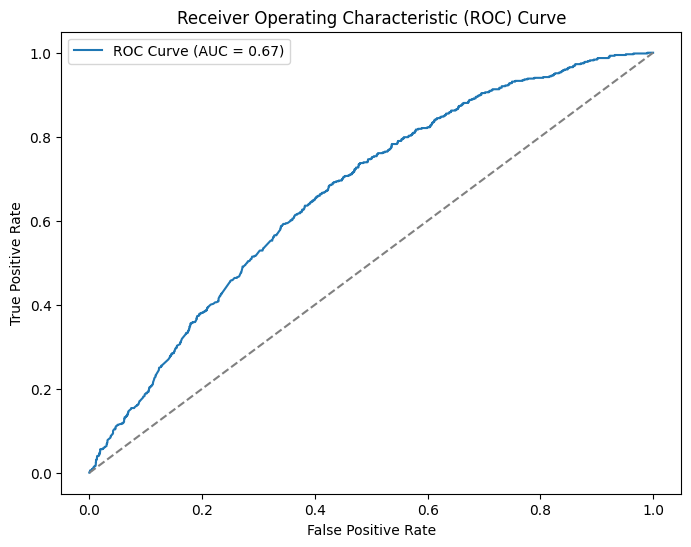

Optimum Threshold (Youden's Index): 0.3810498174780414

Final Performance Metrics for Random Forest Classifier: 
Precision: 0.2262
Recall: 0.6884
F1 Score: 0.3405


In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class (fraud)
y_probs = best_rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score using the best estimator
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Modify threshold to use Youden's index (Youden's J statistic)
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f'Optimum Threshold (Youden\'s Index): {best_threshold}\n')
y_pred_new_threshold = (y_probs > best_threshold).astype(int)

precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_score_new = f1_score(y_test, y_pred_new_threshold)

print(f'Final Performance Metrics for Random Forest Classifier: ')
print(f'Precision: {precision_new:.4f}')
print(f'Recall: {recall_new:.4f}')
print(f'F1 Score: {f1_score_new:.4f}')

#### Feature Importance

Text(0.5, 1.0, 'Top 10 Most Important Features for Random Forest (Relative Importance)')

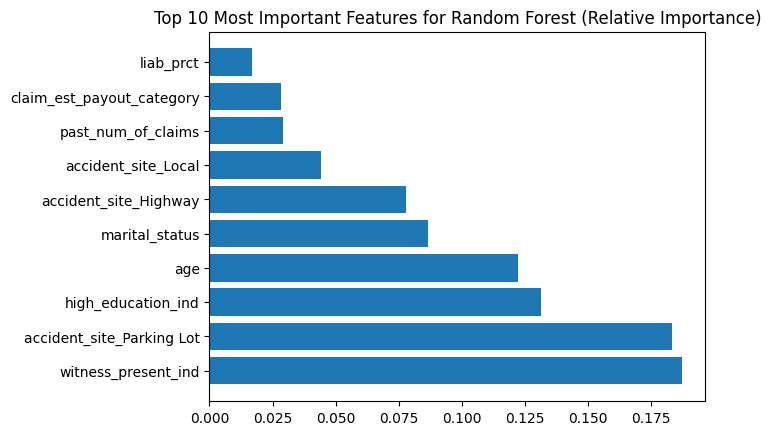

In [9]:
num = 10

randomforest_importances = best_rf_classifier.feature_importances_
order = np.flip(np.argsort(randomforest_importances))[0:num]
plt.barh(range(num),
         randomforest_importances[order],
         tick_label=X_train.columns[order])
plt.title("Top 10 Most Important Features for Random Forest (Relative Importance)")